In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# from google.colab.patches import cv2_imshow
import urllib.request
from time import perf_counter
from numba import njit

In [2]:
req = urllib.request.urlopen('https://www.bioparcvalencia.es/wp-content/uploads/2017/06/ficha-animal-bioparc-valencia-chimpance.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr,-1)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Escribir código para hacer la implementación de:

## a) Convolución completa utilizando ciclos y completa matrices

In [3]:
@njit
def convolucion4F(img, kernel):
  """
  UTILIZAR CON EL DECORADOR NJIT PARA MAYOR RENDIMIENTO
  Regresa imagen con operación de ventana, 
  args: imagengray y matriz kernel 
  """
  kernel = np.flip(kernel)
  nr = img.shape[0]
  nc = img.shape[1]

  nk = kernel.shape[0]//2
  nl = kernel.shape[1]//2
  
  out = np.zeros(img.shape)

  # con 4 ciclos for
  for r in range(nr):
    for c in range(nc):
      for k in range(-nk, nk+1):
        for l in range(-nl, nl+1):
          if k+r >= 0 and l+c >=0 and k+r<nr and l+c<nc:
            out[r,c] += kernel[k+nk,l+nk]*img[r+k,c+l]
            # print(out)
  return out

def completeConvolution(img, kernel):
    """
    Regresa imagen con operación de ventana, 
    args: imagengray y matriz kernel 
    """
    kernel = np.flip(kernel)
    nrows, ncols = img.shape
    krows, kcols = kernel.shape
    pad_size = (krows - 1) // 2
    padded_img = np.pad(img, pad_size, mode='constant')
    output = np.zeros((nrows, ncols))
    for i in range(nrows):
        for j in range(ncols):
            output[i, j] = np.sum(
                padded_img[i:i+krows, j:j+kcols] * kernel)
    return output

In [4]:
x=np.array([[1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10]])

h=np.array([
  [1,2,1],
  [2,4,2],
  [1,2,1]
])

conv4for= convolucion4F(x, h)
print('4 ciclos for')
print(conv4for)

convMtx= completeConvolution(x, h)
print('Matrices')
print(convMtx)

4 ciclos for
[[ 12.  24.  36.  48.  60.  72.  84.  96. 108.  87.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 12.  24.  36.  48.  60.  72.  84.  96. 108.  87.]]
Matrices
[[ 12.  24.  36.  48.  60.  72.  84.  96. 108.  87.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  

## b) Convolucion desacoplada utilizando ciclos

In [5]:
@njit
def convDesacoplada(img, kernel):
  """
  UTILIZAR CON EL DECORADOR NJIT PARA MAYOR RENDIMIENTO
  Regresa imagen con operación de ventana, 
  args: imagengray y array kernel 
  """
  kernel = kernel[::-1]
  nr = img.shape[0]
  nc = img.shape[1]
  output = np.zeros(img.shape)
  m = len(kernel) // 2

  for l in range(nr):
    for n in range(nc):
      for k in range(-m, m+1):
          if n + k < 0 or n + k >= nc:
              continue
          # print(l,n,k, img[l,n+k], kernel[k+m])    
          output[l,n] += img[l,n+k] * kernel[k+m]
  # print( output)

  output2 = np.zeros(img.shape)
  for l in range(nr):
    for n in range(nc):
      for k in range(-m, m+1):
          if l + k < 0 or l + k >= nr:
              continue
          # print(l,n,k, output[l+k,n], kernel[k+m])    
          output2[l,n] += output[l+k,n]* kernel[k+m]
          # print( output)

  return output2

In [6]:
x=np.array([[1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10]])

h=np.array([1,2,1])
convDes = convDesacoplada(x, h)
print(convDes)

[[ 12.  24.  36.  48.  60.  72.  84.  96. 108.  87.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 12.  24.  36.  48.  60.  72.  84.  96. 108.  87.]]


## c) Convolucion desacoplada utilizando Lisyt Comprenhension y /o operaciones matriciales

In [7]:

def convolveDesacopladaDot(img, kernel):
    kernel = np.flip(kernel)
    nrows, ncols = img.shape
    k_size = kernel.size
    # krows, kcols = kernel.shape
    pad_size = (k_size - 1) // 2
    padded_img = np.pad(img, pad_size, mode='constant')
    # print(padded_img)
    output = np.zeros((nrows, ncols))
    for i in range(ncols):
      output[i,: ]= convolveDot(img[i, :], kernel)
    # print(output)
    output2 = np.zeros((nrows, ncols))
    for j in range(nrows):
      output2[:, j ]= convolveDot(output[ :, j], kernel)
      # print(img[:, j])
    # print(output2)
    return output2

def convolveDot(signal, kernel):
    ker_size = kernel.size
    sig_size = signal.size
    kernel = kernel[::-1]
    pad_size = (ker_size - 1) // 2
    padded_signal = np.pad(signal, pad_size, mode='constant')
    output = np.zeros(sig_size)
    output = [np.dot(padded_signal[k:k+ker_size], kernel) for k in range(sig_size)]
    # print(f"a: {output}" )
    # for k in range(sig_size):
    #     output[k] = np.dot(padded_signal[k:k+ker_size], kernel)
    # print(output)
    return output

In [8]:
x=np.array([[1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10],
            [1,2,3,4,5,6,7,8,9,10]])
h=np.array([1,2,1])

convList = convolveDesacopladaDot(x,h)
print(convList)

[[ 12.  24.  36.  48.  60.  72.  84.  96. 108.  87.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 16.  32.  48.  64.  80.  96. 112. 128. 144. 116.]
 [ 12.  24.  36.  48.  60.  72.  84.  96. 108.  87.]]


# Mostrar los resultados de la convolución de una imagen de 512x512 pixeles con un kernel de caja de tamaño 21x21.


#a) La imagen resultante de la convolución en todos los casos incluyendo la convolución utilizanndo openCV 

In [9]:
kernel = np.ones((21,21), np.float32)/441


## OpenCV

In [10]:
tick = perf_counter()
cvCon =  cv2.filter2D(src=gray, ddepth=-1, kernel=kernel)
tock = perf_counter()
print(f"Tiempo: {tock - tick}")

Tiempo: 0.011120166993350722


## Completa 4 Ciclos For

In [11]:
tick = perf_counter()
conv4for = convolucion4F(gray, kernel)
tock = perf_counter()
print(f"Tiempo: {tock - tick}")

Tiempo: 0.9047216250037309


In [12]:
cv2_imshow(np.hstack((conv4for , cvCon)))

NameError: name 'cv2_imshow' is not defined

## Completa Operaciones Matriciales

In [ ]:
tick = perf_counter()
convMtx = completeConvolution(gray, kernel)
tock = perf_counter()
print(f"Tiempo: {tock - tick}")

Tiempo: 5.010545296999226


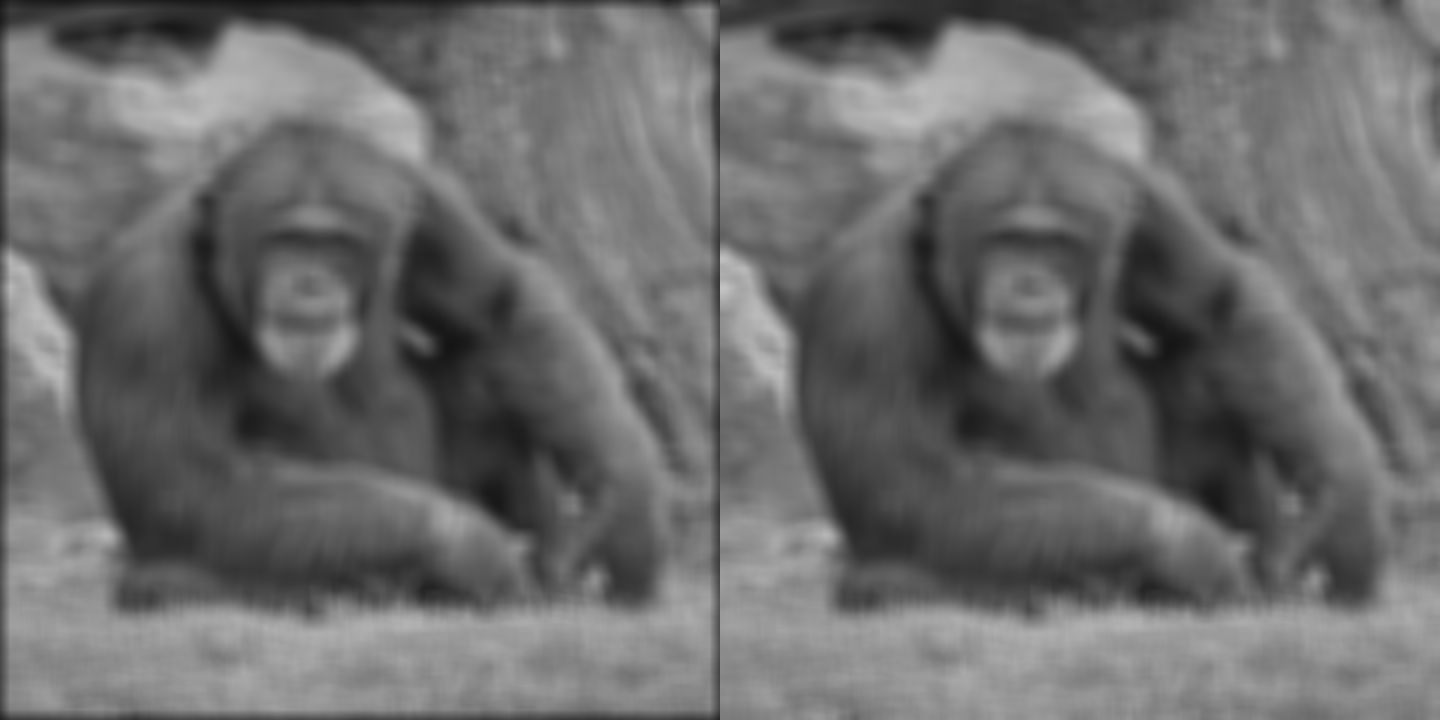

In [ ]:
cv2_imshow(np.hstack((convMtx , cvCon)))

## Desacoplada Completa

In [18]:
h=np.ones(21)*1/21
tick = perf_counter()
graydes = convDesacoplada(gray, h)
tock = perf_counter()
print(f"Tiempo: {tock - tick}")

Tiempo: 0.050966875001904555


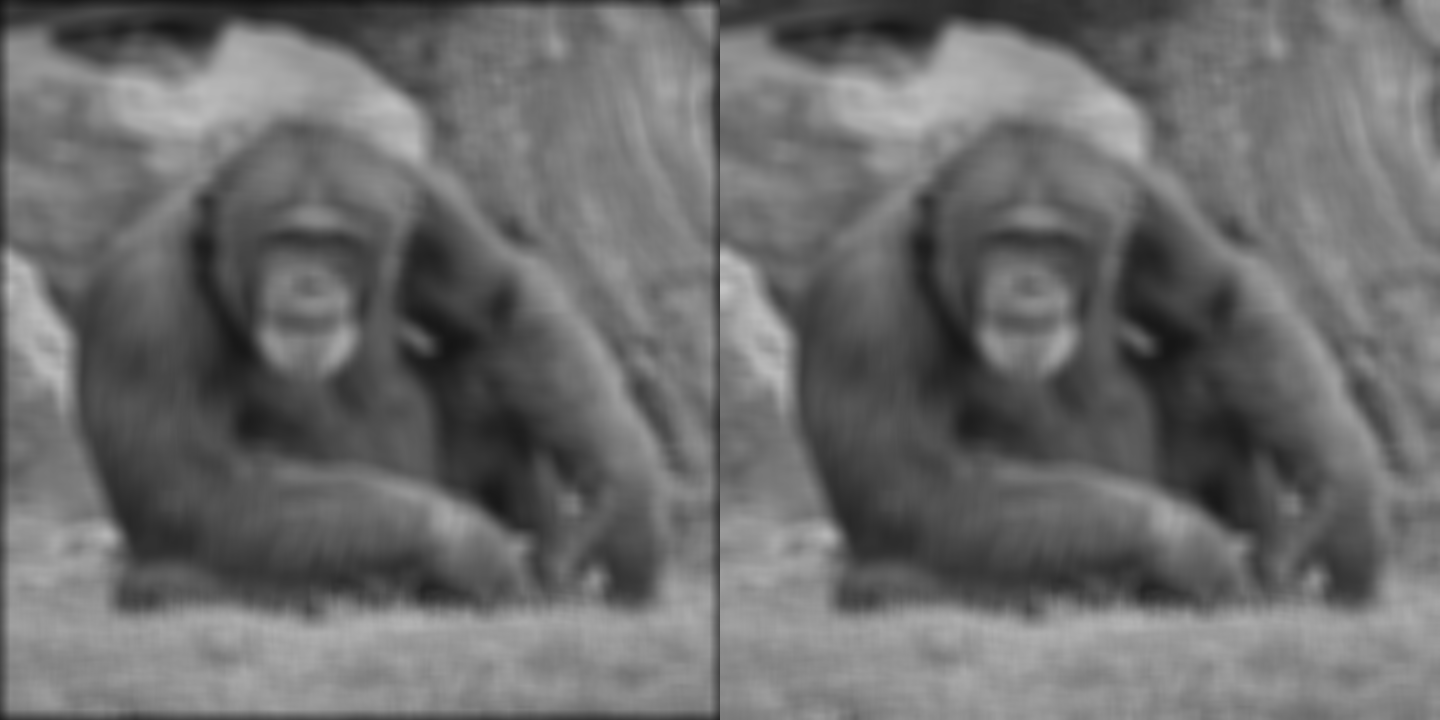

In [ ]:
cv2_imshow(np.hstack((graydes , cvCon)))

## Desacoplada SubArrays

In [ ]:
h=np.ones(21)*1/21
tick = perf_counter()
graydesDot = convolveDesacopladaDot(gray, h)
tock = perf_counter()
print(f"Tiempo: {tock - tick}")

Tiempo: 2.335645941000621


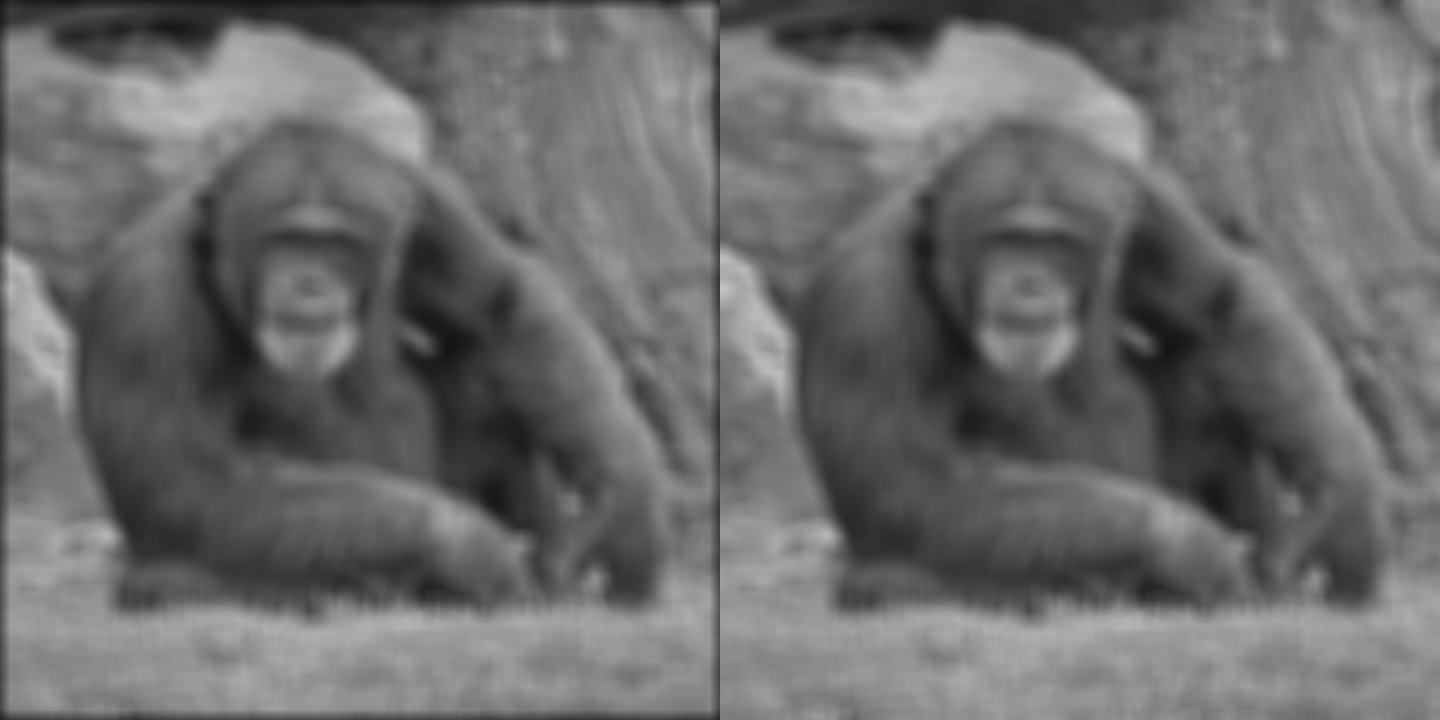

In [ ]:
cv2_imshow(np.hstack((graydesDot , cvCon)))

## b) una tabla donde se presenten los tiempos de ejecución de las convoluciones implementadas así como la convolucion utilizando la librería de openCV.

### Tabla Comparativa 


---



| Modo                     | T1                  | T2                  | T3                   | Promedio            |
|--------------------------|---------------------|---------------------|----------------------|---------------------|
| OpenCv                   | 0.01673325299998400 | 0.01875460999963250 | 0.016193919999750500 | 0.017227260999789   |
| 4 ciclos for             | 282.43966945599900  | 281.31128395000000  | 289.2689733340000    | 284.33997558        |
| Completa Matrices        | 4.328034154999840   | 4.354325887000410   | 4.213686598000100    | 4.298682213333450   |
| Desacoplada Ciclos       | 49.81404654300010   | 49.24522188799980   | 48.7294802360002     | 49.2629162223334    |
| Desacoplada Subarrays    | 1.8348464519999700  | 2.099359720999930   | 1.8928475120001200   | 1.94235122833334    |



---



### EXTRA COMPILADOR JUST IN TIME DE PYTHON 
--- 

| Modo                     | T1                  | T2                  | T3                   | Promedio            |
|--------------------------|---------------------|---------------------|----------------------|---------------------|
| OpenCv                   | 0.01673325299998400 | 0.01875460999963250 | 0.016193919999750500 | 0.017227260999789   |
| @jit 4 ciclos for        | 1.5327755259995700  | 0.7993741450000020  | 0.8136401439996920   | 1.0485966049997500  |
| @jit Desacoplada Ciclos  | 0.08686144700004660 | 0.08139351899990290 | 0.07014470600006460  | 0.07946655733333800 |


---


